<center><img src="football.jpg" width=500></center>

The Super Bowl is a spectacle. It is the final game in the NFL that crowns the winner of that season. There is always a little something for everyone. For the fans, there is the game itself. For those tagging along, there are the unique advertisements and the halftime shows with the biggest musicians in the world.

You're going to explore how these elements interact.

## The Data
The data has been scraped from Wikipedia and is made up of two CSV files covering a span of all Super Bowls up to 2024. This data does contain missing values. The most relevant columns are noted below.  
`data/tv.csv`  
|Column|Description|
|------|-----------|
|`super_bowl`|Super Bowl number (e.g. the first Super Bowl ever is Super Bowl 1 and the last Super Bowl in 2024 is Super Bowl 58)|
|`avg_us_viewers`|Average # of US viewers|
|`share_household`|Percentage of households watching TV that watched the game|
|`rating_household`|Percentage of all households with TVs that watched the game|
|`ad_cost`|Cost per ad|
---
`data/super_bowls.csv`  
|Column|Description|
|------|-----------|
|`super_bowl`|Super Bowl number (e.g. the first Super Bowl ever is Super Bowl 1 and the last Super Bowl in 2024 is Super Bowl 58)|
|`difference_pts`|Point difference for that game|

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NA,Bill Parcells,Buffalo Bills,19,Jim Kelly,NA,Marv Levy,39,1
1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NA,George Seifert,Denver Broncos,10,John Elway,NA,Dan Reeves,65,45


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


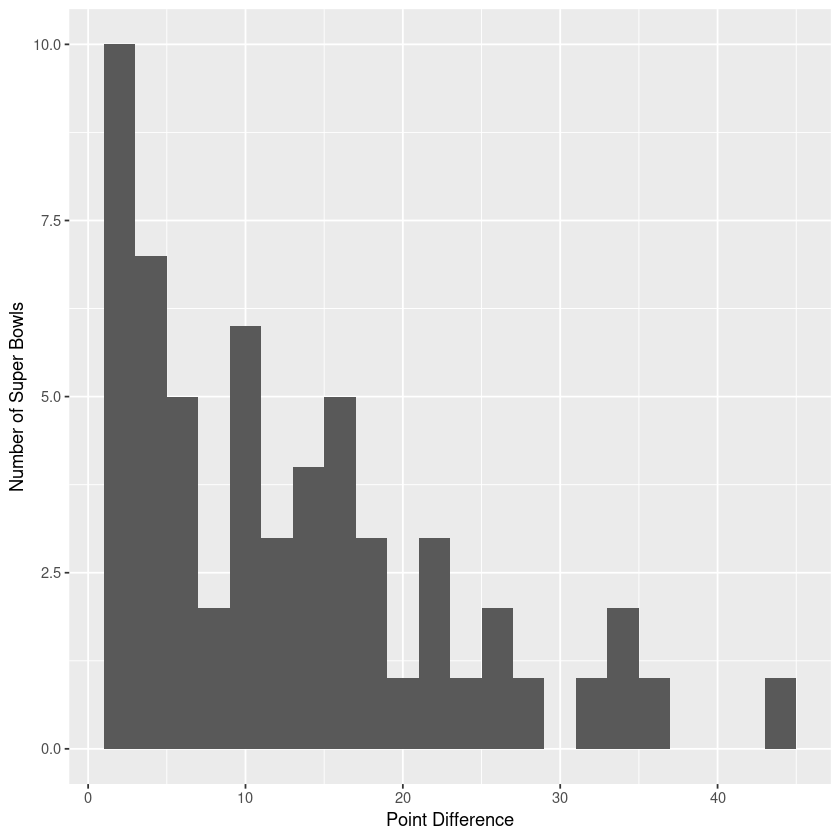

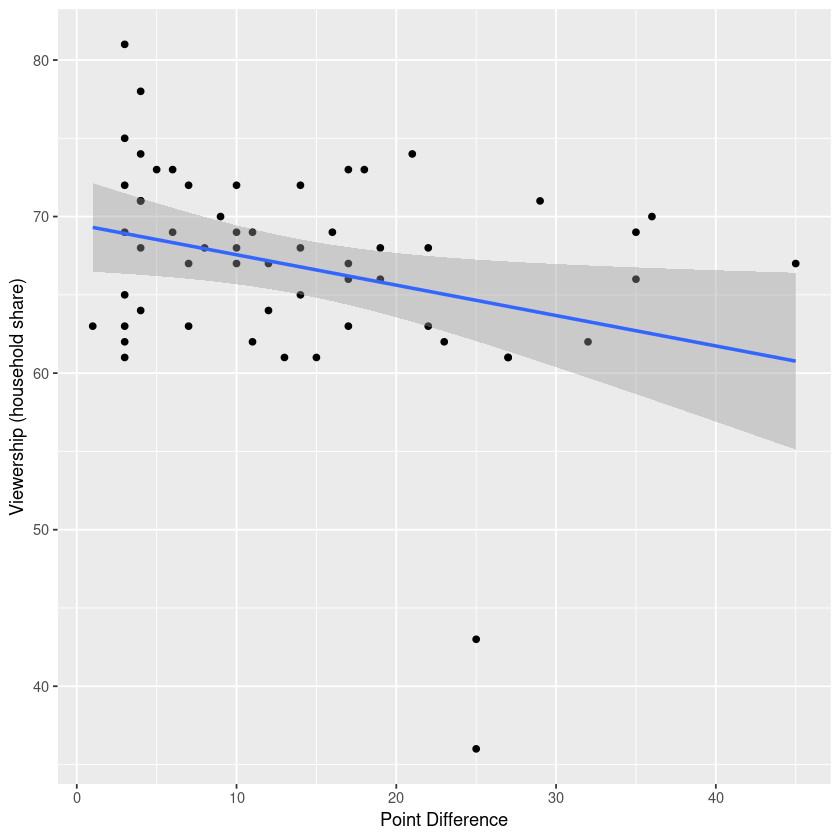

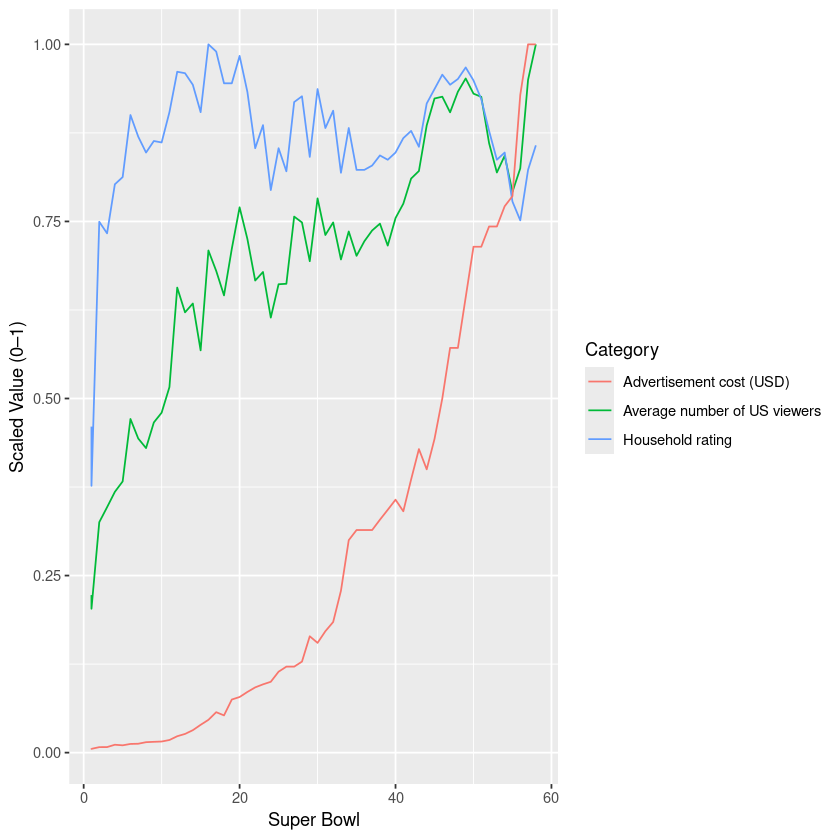

In [2]:
# Load packages
library(tidyverse)

# Load the CSV data
tv  <-  read_csv("data/tv.csv", show_col_types=FALSE)
super_bowls  <-  read_csv("data/super_bowls.csv", show_col_types=FALSE)

# Q1: Do large point differences result in lost viewers?

# Plot a histogram of point differences
ggplot(super_bowls, aes(difference_pts)) +
 geom_histogram(binwidth = 2) +
 labs(x = "Point Difference", y = "Number of Super Bowls")

# Display the closest game and largest point difference
super_bowls  %>% 
 filter(difference_pts == min(difference_pts) | difference_pts == max(difference_pts))

# Merge the game data and TV data
# Optional: you may see that this will result in some outliers in the visualization, you can remove these by filtering out the first game with filter(super_bowl != 1) 
games_tv <- tv  %>% inner_join(super_bowls, by = "super_bowl")

# Optional: keep rows with finite values only for the columns you are plotting
# games_tv <- games_tv %>% filter(is.finite(difference_pts) & is.finite(share_household))

# Create a scatter plot with a linear regression model
ggplot(games_tv, aes(difference_pts, share_household)) +
 geom_point() +
 geom_smooth(method = "lm") +
 labs(x = "Point Difference", y = "Viewership (household share)")

# Interpret the visualization and store your answer to the question
# Interpretation: The downward sloping regression line and the 95% confidence interval for that regression suggest that it is common to lose viewers if there is a large point difference. However, you must take it with a grain of salt because the linear relationship in the data is weak due to the small sample size.
score_impact = "weak"

# Q2: How has the number of viewers and TV ratings trended alongside advertisement costs? Which one increases first?

# Convert the data format for plotting
games_tv_plot_avg_us_viewers <- games_tv %>%
    select(super_bowl, avg_us_viewers) %>%
    mutate(category = "Average number of US viewers", value = avg_us_viewers) %>%
    select(super_bowl, category, value)

games_tv_plot_rating_household <- games_tv %>%
    select(super_bowl, rating_household) %>%
    mutate(category = "Household rating", value = rating_household) %>%
    select(super_bowl, category, value)

games_tv_plot_ad_cost <- games_tv %>%
    select(super_bowl, ad_cost) %>%
    mutate(category = "Advertisement cost (USD)", value = ad_cost) %>%
    select(super_bowl, category, value)

games_tv_plot <- bind_rows(games_tv_plot_avg_us_viewers, 
                           games_tv_plot_rating_household, 
                           games_tv_plot_ad_cost)

# Here is a more efficient way to convert the data using pivot_longer()
# games_tv_plot <- games_tv %>%
#     pivot_longer(cols = c(avg_us_viewers, rating_household, ad_cost), 
#                  names_to = "category", 
#                  values_to = "value") %>%
#     mutate(cat_name = case_when(category == "avg_us_viewers" ~ "Average number of US viewers",
#                                 category == "rating_household" ~ "Household rating",
#                                 category == "ad_cost" ~ "Advertisement cost (USD)",
#                                 TRUE ~ as.character(category)))

# Plot the data
ggplot(games_tv_plot) +
  geom_line(data = games_tv_plot %>% filter(category == "Average number of US viewers"),
            aes(x = super_bowl, y = value / max(value), color = "Average number of US viewers")) +
  geom_line(data = games_tv_plot %>% filter(category == "Household rating"),
            aes(x = super_bowl, y = value / max(value), color = "Household rating")) +
  geom_line(data = games_tv_plot %>% filter(category == "Advertisement cost (USD)"),
            aes(x = super_bowl, y = value / max(value), color = "Advertisement cost (USD)")) +
  labs(x = "Super Bowl", y = "Scaled Value (0–1)", color = "Category")

# Optional: here is a fast way to plot the data using facet_wrap()
# ggplot(games_tv_plot, aes(super_bowl, value)) +
#  geom_line() +
#  facet_wrap(~ category, scales = "free", nrow = 3) + 
#  labs(x = "Super Bowl", y = "")

# Interpret the visualization and store your answer to the question
# Interpretation: The ratings increased before advertisement costs did, but viewers were increasing quickly as well. Perhaps TV networks didn't know how to use this data to demand higher advertisement costs sooner, or they needed more evidence before they could justify the increase.
first_to_increase = "ratings"